In [2]:
#importing required  modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("SLR.csv")
df.head()

,hrs_studied,grade
0,2,69
1,9,98
2,5,82
3,5,77
4,3,71


In [8]:
#meta data of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   hrs_studied  10 non-null     int64
 1   grade        10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [9]:
x = np.array(df['hrs_studied']).reshape(-1,1)
y = np.array(df['grade']).reshape(-1,1)

In [10]:
#Seperating train and test data randomly
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.8,random_state =0)



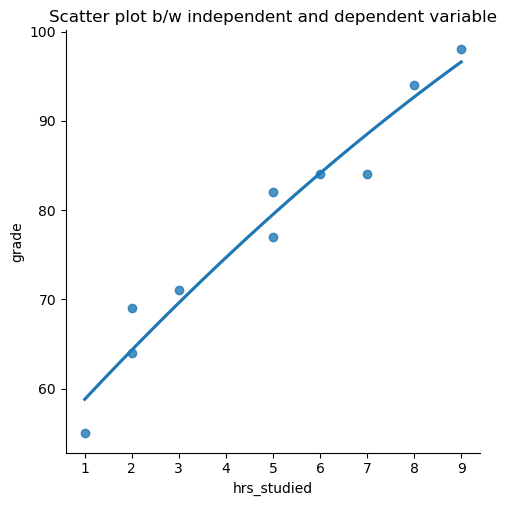

In [11]:
#checking relationship b/w x and y variables
sns.lmplot(x="hrs_studied",y='grade',data=df,order = 2, ci = None)
plt.title("Scatter plot b/w independent and dependent variable")
plt.show()

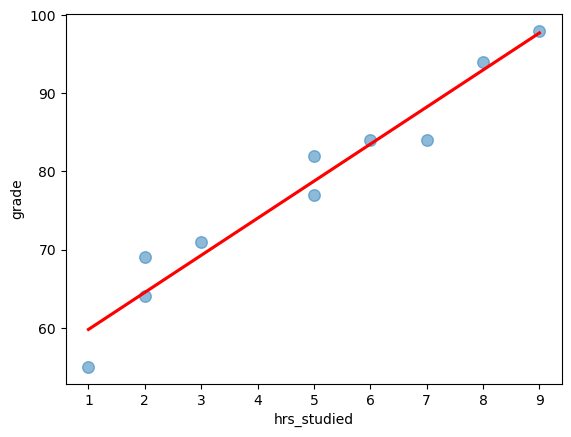

In [30]:
sns.regplot(x="hrs_studied", y="grade", data=df, scatter_kws={"s": 70, "alpha": 0.5},line_kws ={'color':'red'},ci=None)
plt.show()


In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(xtrain,ytrain)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(xtest)

In [33]:
y_pred

array([[78.74852071],
       [83.49112426]])

In [34]:
ytest

array([[82],
       [84]], dtype=int64)

In [35]:
#Coefficients
mean_x = np.mean(df['hrs_studied'])
mean_y = np.mean(df['grade'])

# Calculate variance of x and y
var_x = np.var(df['hrs_studied'], ddof=1)
var_y = np.var(df['grade'], ddof=1)

# Calculate covariance of x and y
cov_xy = np.cov(df['hrs_studied'],df['grade'], ddof=1)[0,1]
# Calculate slope and intercept
b = cov_xy / var_x
a = mean_y - b * mean_x

# Print the slope and intercept
print("Intercept: ", a)
print("Slope: ", b)

Intercept:  55.035502958579876
Slope:  4.742603550295859


In [36]:
#verifying 
print("slope :",model.coef_)
print("intercept :",model.intercept_)

slope : [[4.74260355]]
intercept : [55.03550296]


In [37]:
x_new = np.array([1,2,3,4,5,6,7]).reshape(-1,1)
y_new = np.array([4,5,6,7,8,9,10]).reshape(-1,1)
model.fit(x_new,y_new)
x_test_new = np.array([8,9,10]).reshape(-1,1)
y_pred2 = model.predict(x_test_new)
y_pred2

array([[11.],
       [12.],
       [13.]])

In [38]:
#errors 
residuals = ytest - y_pred
MSE = (np.sum(residuals* residuals))/len(residuals)
MSE

5.4155360456566735

In [39]:
r_squared = (np.sum((y_pred - mean_y)**2))/np.sum(((ytest-mean_y)**2))
r_squared

0.59359106426913

5.044575156663085 55.11766905146213
